# Bayesian Methods for Hackers - Chapter 01 

# Example 01: Coin Flips

In [ ]:
%matplotlib inline 
from IPython.core.pylabtools import figsize
import numpy as np 
from matplotlib import pyplot as plt 
figsize(11, 9)

import scipy.stats as stats

In [ ]:
# We will be using the beta distribution's parameterization of the conjugate prior for Binomial
dist = stats.beta 

# The number of coins we will toss
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]

# The number of heads observed in `n_trials` coin tosses, assuming probability of success is 0.5
data = stats.bernoulli.rvs(0.5, size = n_trials[-1])

# Not sure what this does
x = np.linspace(0, 1, 100)

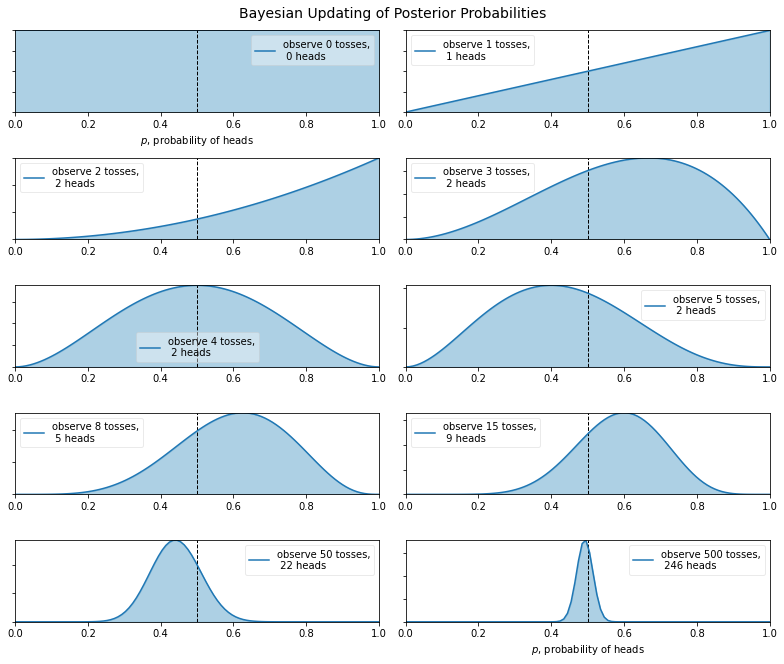

In [ ]:
# Using the Beta distribution (actually the uniform distribution) as the prior for Binomial 
# Posterior. Beta distribution is the conjugate prior for Binomial. 

for k, N in enumerate(n_trials):
  # Array of plots with half as many rows as plots, and two columns 
  # Last argument is the index of the plot
  sx = plt.subplot(len(n_trials) / 2, 2, k + 1)

  # Add an x label to a plot if the the current plot number is in the number of trials? 
  plt.xlabel('$p$, probability of heads') if k in [0, len(n_trials) - 1] else None 

  # For each plot, set the y tick labels to blanl
  plt.setp(sx.get_yticklabels(), visible = False) 

  # `data[:N]` contains the result of tossing a coin `N` times with 1 indicating a head.
  # By subsetting until `N` and then summing, we find the number of heads 
  heads = data[:N].sum()

  # Posterior is parameterised as a beta distribution that is updated by the 
  # heads observed in the number of trials N
  y = dist.pdf(x, 1 + heads, 1 + N - heads) 

  # Add a label to each plot
  plt.plot(x, y, label = 'observe %d tosses,\n %d heads' % (N, heads))

  # Fill the PDF 
  plt.fill_between(x, 0, y, color = '#348ABD', alpha = 0.4) 

  # Hard coding the dotted line for 
  plt.vlines(0.5, 0, 4, color = 'k', linestyles = '--', lw = 1)

  leg = plt.legend()
  leg.get_frame().set_alpha(0.4)
  plt.autoscale(tight = True) 

plt.suptitle('Bayesian Updating of Posterior Probabilities', y = 1.02, fontsize = 14)
plt.tight_layout()

# Example 02 - Code Passing Tests 

- $A$ = an event denoting code that has no bugs.
 $X$ = an event denoting the evidence: the code passing X test cases.
- $P(A)$ = The probability (or in the Bayesian sense, the belief) that the code has no bugs. We can assume this is $p$. This is the **prior**.
- $P(A | X)$ = The probability that the code has no bugs given it passed all tests. This is the **posterior**.
- $P(X | A)$ = The probability that all test cases are passed given the code has no bugs = 1 (since if the code has no bugs, then all test cases must pass). This is the **likelihood**.
- $P(X | A^C)$ = The probability that all test cases are passed given the code **does have** have bugs. We can assume for this example that this is 0.5. T

By Bayes theorem 
$$P(A|X) = \frac{P(X|A) \times P(A)}{P(X)} = \frac{P(X|A) \times P(A)}{P(X|A)P(A) + P(X|A^C)P(A^C)}$$
$$P(A|X) = \frac{1 \times p}{1 \times p + \frac{1}{2}\times (1 -p)} = \frac{2p}{1 + p}$$

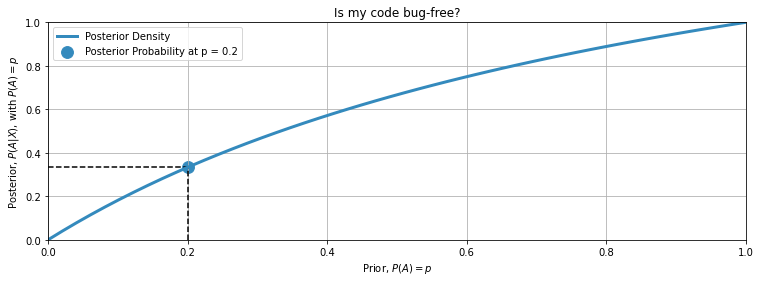

In [ ]:
# What does our posterior probability look like as a function of our prior p in [0, 1]?
figsize(12.5, 4)

# We assume 50 equally-spaced discrete values of prior probability between 0 and 1
p = np.linspace(0, 1, 50)

# This line shows the posterior probability distribution over the entire range of priors
plt.plot(p, 2 * p / (1 + p), color = '#348ABD', lw = 3, label = 'Posterior Density')

# This dot shows the posterior probability at a specific value of the prior
plt.scatter(0.2, 2 * (0.2) / 1.2, s = 140, c = '#348ABD', label = 'Posterior Probability at p = 0.2')

# Set up the plot
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Prior, $P(A) = p$')
plt.ylabel('Posterior, $P(A|X)$, with $P(A) = p$')
plt.title("Is my code bug-free?")

# Lines at the x and y values of the updated posterior
plt.hlines(y = 2 * 0.2 / 1.2, xmin = 0, xmax = 0.2, linestyles = '--')
plt.vlines(x = 0.2, ymin = 0, ymax = 2 * 0.2 / 1.2, linestyles = '--')
plt.legend()
plt.grid()

If we assume a prior probability of 0.2 then we're assuming there is a 20 percent chance that we wrote bug-free code. 

But based on the number of test cases passed, the updated posterior belief is around 0.33.

## Comparing the Prior and Posterior Probabilities

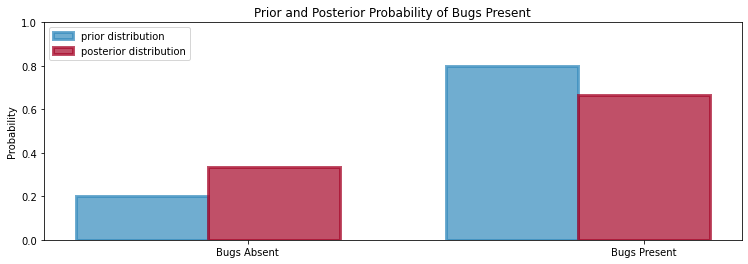

In [ ]:
figsize = (12.5, 4)
colors = ['#348ABD', '#A60628']

prior = [0.2, 0.8]
posterior = [1. /3, 2./ 3]
plt.bar([0, .7], prior, alpha = 0.7, width = 0.25, color = colours[0], label = 'prior distribution',
        lw = '3', edgecolor = colours[0])

plt.bar([0 + 0.25, .7 + 0.25], posterior, alpha = 0.7, width = 0.25, color = colors[1], 
        label = 'posterior distribution', lw = '3', edgecolor = colors[1])

plt.ylbbim(0, 1)
plt.xticks([0.2, 0.95], ['Bugs Absent', 'Bugs Present'])
plt.title('Prior and Posterior Probability of Bugs Present')
plt.ylabel('Probability')
plt.legend(loc = 'upper left')

# Example 3 - Poisson Distribution

Text(0.5, 1.0, 'Probability Mass Function of a Poisson Random Variable: Differing $\\lambda$ values.')

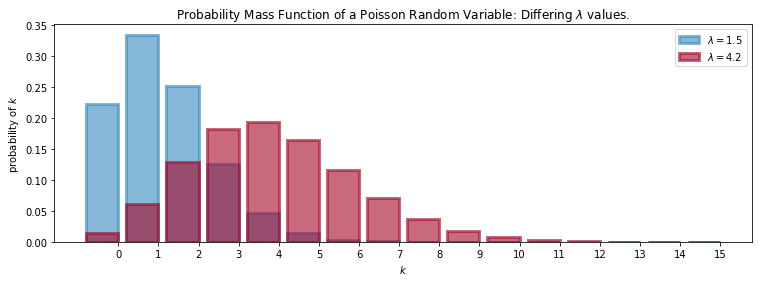

In [ ]:
import scipy.stats as stats
plt.figure(figsize = (12.5, 4))

# Different values of the a Poisson random variable
a = np.arange(16)

# Lambda is a rate parameter of the poisson distribution
poi = stats.poisson

# Higher lambda -> higher probability at larger values of the random variable
lambda_ = [1.5, 4.25]

# Each lambda's barplot will be coded with a different value
colours = ['#348ABD', '#A60628']

# THe Poisson distribution for lambda = 1.5
plt.bar(a, poi.pmf(a, lambda_[0]), color = colours[0], label = '$\lambda = %.1f$' % lambda_[0], 
        alpha = 0.6, edgecolor = colours[0], lw = '3')

# The poisson distribution for lambda = 4.25
plt.bar(a, poi.pmf(a, lambda_[1]), color = colours[1], label = '$\lambda = %.1f$' % lambda_[1], 
        alpha = 0.6, edgecolor = colours[1], lw = '3')

# Shifting the xticks so that they coincide with the middle of the bars
plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel('probability of $k$')
plt.xlabel('$k$')
plt.title('Probability Mass Function of a Poisson Random Variable: Differing $\lambda$ values.')

# Example 04 - Exponential Distribution

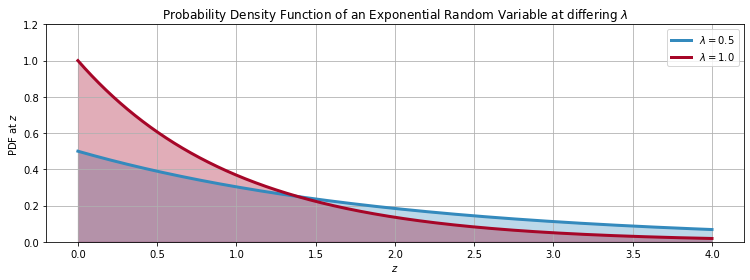

In [ ]:
a = np.linspace(0, 4, 1000)       # Pseudo-continuous values of the continuous RV
expo = stats.expon                # Will be creating an exponential distribution
lambda_ = [0.5, 1]                # With two different values of the rate parameter

# For each value of lambda, plot the continuous exponential distribution
for my_lambda, c in zip(lambda_, colours):
  plt.plot(a, expo.pdf(a, scale = 1. / my_lambda), lw = 3, color = c, label = '$\lambda = %.1f$' % my_lambda)
  plt.fill_between(a, expo.pdf(a, scale = 1. / my_lambda), color = c, alpha = 0.33)

plt.legend()
plt.ylabel('PDF at $z$')
plt.xlabel('$z$')
plt.ylim(0, 1.2)
plt.title('Probability Density Function of an Exponential Random Variable at differing $\lambda$')
plt.grid()

In the real world, we don't know the value of lambda for any given data generating process. We often have to estimate the value of lambda. We can do this through a number of techniques, and Bayesian statistics is one of them. 

We often observe the real world data $z$ and must go backwards to try and determine $\lambda$. There is no one-one mapping from $z$ to $\lambda$. $\lambda$ can only be estimated since it is never actually observed. 

In Bayesian statistics, rather than try to guess what $\lambda$ might be, we try to assign a belief or probability distribution to $\lambda$. Even though there is only one "true" value of $\lambda$, our belief about $\lambda$ i.e. the probability that $\lambda$ is a specific value is a continuous distribution.

# Example 05 - Inferring Behaviour from Text Message Data

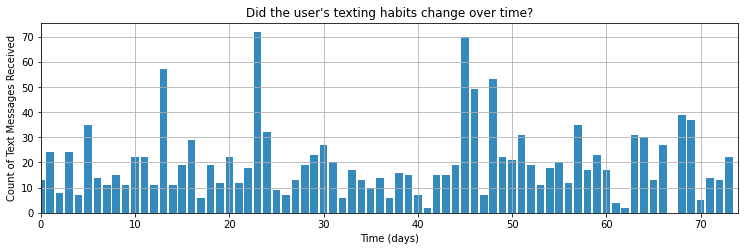

In [ ]:
# Using text-message frequency data, predict whethee the user's texting habits changed over time. 
plt.figure(figsize = (12.5, 3.5))
count_data = np.loadtxt("https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/Chapter1_Introduction/data/txtdata.csv")

n_count_data = len(count_data)      # Number of days for which we have data
plt.bar(np.arange(n_count_data), count_data, color = '#348ABD')
plt.xlabel('Time (days)')
plt.ylabel('Count of Text Messages Received')
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data)
plt.grid()

Modeling the count of text messages received per day $C_i$ using a Poisson distribution.
$$C_i \sim Poisson(\lambda)$$

We don't know what the "true" value of a $\lambda$ is but looking at the distribution, we can tell that $C_i$ becomes larger later on in the observation period. 

Recall that a higher value of $\lambda$ in the Poisson distribution will shift the probability towards larger outcomes. 

One way to model this mathematically is to assign a different $\lambda$ value to "earlier" and "later" observations based on some threshold $\tau$. This is a **switchpoint**. 

## Modeling $\lambda$
To perform Bayesian inference, we need to assume a prior probability distribution of $\lambda_1$ and $\lambda_2$. We can model them using the exponential distribution, for which we have to provide an additional parameter $\alpha$. 

$$\lambda_1 \sim Exp(\alpha)$$
$$\lambda_2 \sim Exp(\alpha)$$

$\alpha$ is a hyperparameter in the sense that it is a parameter that influences other parameters. 

Our initial guess at $\alpha$ does not influence the model too strongly, so we can choose whatever value we want. A good rule of thumb is to choose the inverse of the average of the count data. 

$$\frac{1}{N} \sum_{i= 0}^{N} C_i \approx E[\lambda | \alpha] = \frac{1}{\alpha} \Rightarrow \alpha \approx \frac{1}{E[\lambda|\alpha]}$$

Basically, $\lambda$ has a Poisson distribution, and the expected value of the Poisson distribution is the same as its rate parameter $\lambda$. A good value of the hyperparameter $\alpha$ to set for the inverse of this expected value. 

## Modeling $\tau$
We can assume $\tau$ is uniformly distributed. 
$$P(\tau = k) = \frac{1}{70}$$

# PyMC3

We will use PyMC3 to sample from the posterior distributions for $\lambda$. 

In [ ]:
!pip install pymc

     |████████████████████████████████| 389kB 5.7MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp36-cp36m-linux_x86_64.whl size=1343944 sha256=0f989c36093c1867502d7282bbbe20e53d1b4e7f97b02722d03881253802f740
  Stored in directory: /root/.cache/pip/wheels/0b/a8/e7/8f3ba91a39294d538a92db052fd1fcba1fca74a58c8b022026
Successfully built pymc


In [ ]:
import pymc as pm

# We set the alpha parameter of the exponential distribution to the inverse of data's mean 
alpha = 1.0 / count_data.mean()     

# We model the rate parameter of text messages using the exponential distribution
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

# We model the switchpoint using a uniform distribution
tau = pm.DiscreteUniform("tau", lower = 0, upper = n_count_data)

The `lambda` and `tau` parameters are stochastic variables: on the backend, they are essentialy random number generators. We can demonstrate this by calling their built-in `random()` methods.

In [ ]:
print("Random Output: ", tau.random(), tau.random(), tau.random())

Random Output:  19 52 58


In [ ]:
@pm.deterministic 
def lambda_(tau = tau, lambda_1 = lambda_1, lambda_2 = lambda_2):
  out = np.zeros(n_count_data)
  out[:tau] = lambda_1            # lambda before tau is lambda_1 
  out[tau:] = lambda_2            # lambda after (and including) tau is lambda_2
  return out

Here, we've created a function called `lambda_` that is essentially a random variable: specifically, it is the rate parameter of the Poisson distribution that we will be using to model the count of text messages received per day $C_i$. 

By using the decorator `@pm.deterministic` we are telling PyMC that `lambda_` is a deterministic function: if the arguments are deterministic (fixed) then the output will be deterministic (fixed) as well.

In [ ]:
observation = pm.Poisson("obs", lambda_, value = count_data, observed = True)
model = pm.Model([observation, lambda_1, lambda_2, tau])

Using the `value` keyword, We have combined our `count_data` with our proposed data generating process given by the variable `lambda_`.

We have also set `observed = True` to tell PyMC that this should stay fixed in our analysis. 

Finally, we collect all variables of importance in a single `Model` object


In [ ]:
mcmc = pm.MCMC(model)
mcmc.sample(40 * (10 ** 3), 10 * (10 ** 3), 1)

/usr/local/lib/python3.6/dist-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 40000 of 40000 complete in 7.0 sec

This is a single learning step: we are using the Markov Chain Monte Carlo technique to sample 40,000 samples for `lambda_1`, `lambda_2`, and `tau` from the posterior distributions of these variables. 

We can plot a histogram of these random variables to see what their posteriors look like. 

The posterior samples of each random variable are collected together into what a **trace**.

In [ ]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

Text(0.5, 0, '$\tau$ value')

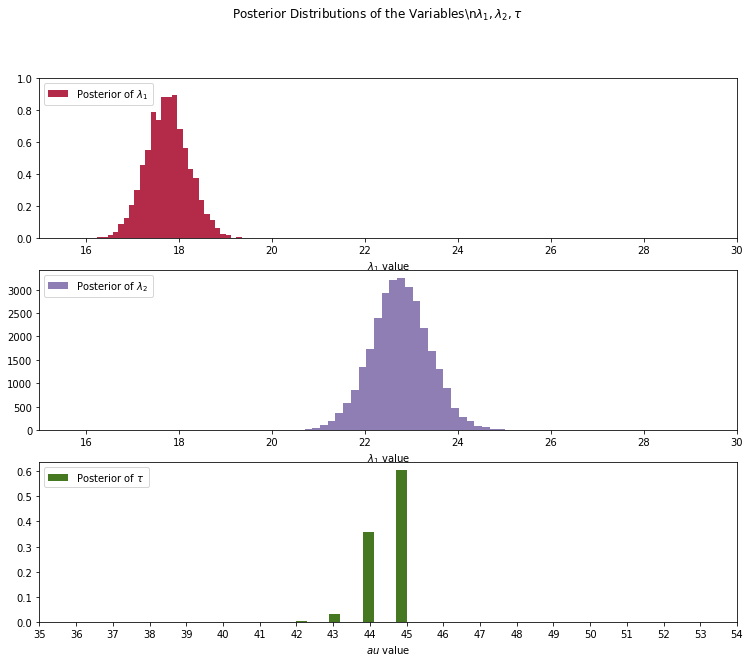

In [ ]:
plt.figure(figsize = (12.5, 10))

plt.suptitle(r"""Posterior Distributions of the Variables\n$\lambda_1,\lambda_2,\tau$""")

# The posterior distribution for lambda_1
ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype = 'stepfilled', bins = 30, alpha = 0.85, 
         label = 'Posterior of $\lambda_1$', color = '#A60628', density = True)
plt.legend(loc = 'upper left')
plt.xlim([15, 30])
plt.xlabel('$\lambda_1$ value')

# Posterior distribution for lambda_2
ax = plt.subplot(312)
plt.hist(lambda_2_samples, histtype = 'stepfilled', bins = 30, alpha = 0.85, 
         label = 'Posterior of $\lambda_2$', color = '#7A68A6')
plt.legend(loc = 'upper left')
plt.xlim([15, 30])
plt.xlabel('$\lambda_1$ value')

# Posterior distribution for tau 
ax = plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, histtype = 'stepfilled', alpha = 1, color = '#467821', 
         weights = w, rwidth = 2., label = 'Posterior of $\\tau$')
plt.xticks(np.arange(n_count_data))
plt.legend(loc = 'upper left')
plt.xlim([35, len(count_data) -20])
plt.xlabel('$\tau$ value')

# Example 06 - Using Bayesian Inference 
Sampling from the posterior distribution for some parameters can help us answer data-related questions. 

For instance, we can use the posterior samples from the previous example to answer the following question: what is the expected number of texts at day $t$ where $0 <= t <= 70$? 

The expected value of a Poisson variable is equal to the rate parameter $\lambda$. Hence, if we sample the posterior for the appropriate $\lambda$, we can essentially answer the question by answerin: what is the expected value of $\lambda$ at time $t$?

In [ ]:
"""
Given a day t, we average over all possible lambda_i for that day t using lambda_i = 
lambda_1, i if t < tau_i (that is, if the behaviour change has not yet occurred). 
Otherwise, we use lambda_i = lambda_2, i
"""
# tau_samples, lambda_1_samples, lambda_2_samples cont vain N samples from the corresponding posterior distributions
N = tau_samples.shape[0]                            # 30k
expected_texts_per_day = np.zeros(n_count_data)     # One expected value per day

# For each day
for day in range(0, n_count_data):
  # ix is a bool index of all tau samples corresponding to the switchpoint 
  # occurring prior to the value of `day`. So if the current value of `day` 
  # is before the parsed value in `tau_samples`, ix will be set to 0 at that point
  # ix will have 30k TRUE/FALSE values
  ix = day < tau_samples 

  # Each posterior sample corresponds to a value for `tau`. For each day, that 
  # value of `tau` indicates whether we're before the switchpoint (in lambda_1 regime)
  # or after the switchpoint (lambda_2 regime).
  # By taking the posterior sample of lambda_1/2 accordingly we can average 
  # over all the samples to get an expected value for lambda on that day 
  # As explained, the "message count" random variable is Poisson distributed
  # and therefore lambda (the poisson) parameter is the expected value of "message count"
  # We subset lambda_1_samples wherever ix is TRUE and sum the lambda_1_values.
  # Likewise, we subset lambda_2_samples wherever ix is FALSE and sum these lambda_2_values too.
  # The expected value on that day is the same as the rate parameter. 
  # When the day is below 42, only lambda_1s samples will be used. 
  # When the day is above 45, only lambda_2s samples will be used 
  # But between 42 and 45, the chances that the switchpoint has occurred increases. 
  # So we start sampling more from lambda2 than from lambda1. 
  print(f"Day: {day} | lambda_1_indexed: {len(lambda_1_samples[ix])} | lambda_2_indexed: {len(lambda_2_samples[~ix])}")
  expected_texts_per_day[day] = (
      lambda_1_samples[ix].sum() + 
      lambda_2_samples[~ix].sum()
    ) / N

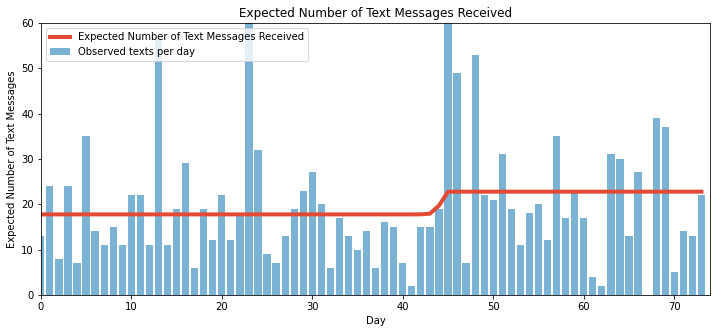

In [ ]:
plt.figure(figsize = (12, 5))
plt.plot(range(n_count_data), expected_texts_per_day, lw = 4, color = '#E24A33',
         label = 'Expected Number of Text Messages Received')
plt.xlim(0, n_count_data)
plt.xlabel('Day')
plt.ylabel('Expected Number of Text Messages')
plt.title('Expected Number of Text Messages Received')
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color = '#348ABD', alpha = 0.65, 
        label = 'Observed texts per day')

plt.legend(loc = 'upper left')

In [ ]:
# 30k samples from the posterior distribution for tau - the average is likely the 'true' value of tau 
# tau is the switchpoint - it is the day number on which the texting habits changed
print(f"tau_samples has shape {tau_samples.shape}\nMean value of tau: {tau_samples.mean():.2f}")

tau_samples has shape (30000,)
Mean value of tau: 44.57


In [ ]:
print(f"lambda_1_samples has shape {lambda_1_samples.shape}\nMean value of: {lambda_1_samples.mean():.2f}")

lambda_1_samples has shape (30000,)
Mean value of: 17.75


In [ ]:
print(f"lambda_1_samples has shape {lambda_2_samples.shape}\nMean value of: {lambda_2_samples.mean():.2f}")

lambda_1_samples has shape (30000,)
Mean value of: 22.76


The story that these posterior distributions tell us is that there was most likely a change in texting habits around day 45. Before this, the average number of texts per day 17.75 and after this the average changed to 22.76. 

# Exercises

## Exercise 1
Using `lambda_1_samples` and `lambda_2_samples`, what is the mean of the posterior distributions of $\lambda_1$ and $\lambda_2$? 

In [ ]:
print(f"Mean of lambda_1: {lambda_1_samples.mean():.2f}\nMean of lambda_2: {lambda_2_samples.mean():.2f}")

Mean of lambda_1: 17.75
Mean of lambda_2: 22.76


## Exercise 2
What is the expected percentage increase in the text-message rates? 

Relative Increase: 28.3183


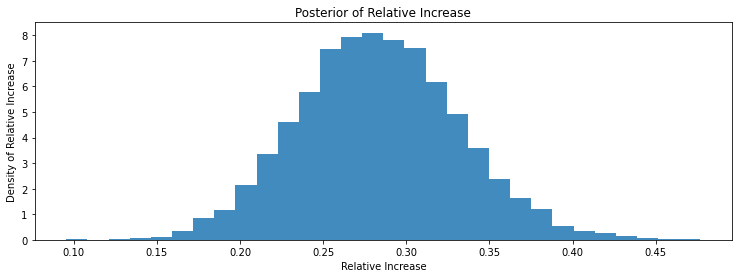

In [ ]:
# Compute the mean of lambda_1_samples / lambda_2_samples 
relative_increase_samples = (lambda_2_samples - lambda_1_samples) / lambda_1_samples

plt.figure(figsize = (12.5, 4))
plt.hist(relative_increase_samples,histtype = 'stepfilled', bins = 30, alpha = 0.85, 
         density = True, label = 'posterior of relative increase')
plt.xlabel('Relative Increase')
plt.ylabel('Density of Relative Increase')
plt.title('Posterior of Relative Increase')

print(f"Relative Increase: {relative_increase_samples.mean() * 100:.4f}")

`lambda_1_samples` and `lambda_2_samples` are both samples from posterior distributions for `lambda_1` and `lambda_2` respectively. 

Both lambda parameters are essentially equal to the expected value of the count of text messages received per day, since the count $C_i$ is parameterized as a Poisson distribution, and $E[C_i] \approx \lambda_i$.

`lambda_1` = the rate of text messages received before the switchpoint. 

`lambda_2` = the rate of text messages received after the switchpoint. 

## Exercise 3

What is the meaning of $\lambda_1$ given that we know $\tau$ is less than 45? That is, suppose we have been given new information that the change in behaviour occurred prior to day 45. What is the expected value of $\lambda_1$ now? 

In [ ]:
cutoff_day = 45
ix = tau_samples < cutoff_day 
print(lambda_1_samples[ix].mean())

17.742229563133073
